In [213]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [214]:
Data=pd.read_csv('diabetes_prediction_dataset.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [215]:
Data.shape

(100000, 9)

In [216]:
Data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [217]:
Data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [218]:
Data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## convert our columns to numeric columns 

In [220]:
Data = pd.get_dummies(Data,columns=['gender'])
Data

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,True,False,False
1,54.0,0,0,No Info,27.32,6.6,80,0,True,False,False
2,28.0,0,0,never,27.32,5.7,158,0,False,True,False
3,36.0,0,0,current,23.45,5.0,155,0,True,False,False
4,76.0,1,1,current,20.14,4.8,155,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,True,False,False
99996,2.0,0,0,No Info,17.37,6.5,100,0,True,False,False
99997,66.0,0,0,former,27.83,5.7,155,0,False,True,False
99998,24.0,0,0,never,35.42,4.0,100,0,True,False,False


In [221]:
Data = pd.get_dummies(Data,columns=['smoking_history'])
Data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,True,False,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,True,False,False,False,False,False,False,True,False


In [222]:
y=Data['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [223]:
x=Data[['bmi','blood_glucose_level']]
x.shape

(100000, 2)

In [224]:
x

,bmi,blood_glucose_level
0,25.19,140
1,27.32,80
2,27.32,158
3,23.45,155
4,20.14,155
...,...,...
99995,27.32,90
99996,17.37,100
99997,27.83,155
99998,35.42,100


"""**SPLITTING DATASET TO TRAINING DATA AND TESTING DATA**"""

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,shuffle=True)
print(f"x_train={x_train[:]}")
print(f"x_test={x_test[:5]}")
print(f"y_train={y_train[:5]}")
print(f"y_test={y_test[:5]}")

x_train=         bmi  blood_glucose_level
82312  46.41                  130
32404  30.09                  155
12626  30.22                  160
84955  17.01                  140
83275  27.32                   90
...      ...                  ...
31962  27.32                  155
88988  16.33                  200
23775  19.93                  126
37135  38.80                  145
92634  29.75                  158

[75000 rows x 2 columns]
x_test=         bmi  blood_glucose_level
45218  26.04                  126
74763  27.32                  160
43778  20.46                   80
75551  21.06                  145
10086  28.65                  140
y_train=82312    0
32404    0
12626    0
84955    0
83275    0
Name: diabetes, dtype: int64
y_test=45218    0
74763    0
43778    0
75551    0
10086    0
Name: diabetes, dtype: int64


In [227]:
print(f"x_train={x_train.shape}")
print(f"x_test={x_test.shape}")
print(f"y_train={y_train.shape}")
print(f"y_test={y_test.shape}")

x_train=(75000, 2)
x_test=(25000, 2)
y_train=(75000,)
y_test=(25000,)


# Random Forest Classifier

In [229]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

clf.fit(x, y)
Score=clf.score(x_test,y_test)
print(clf.feature_importances_)
print(Score*100)

[0.19399462 0.80600538]
94.856


In [230]:
y_predict=clf.predict(x_test)
print(list(y_predict[:50]))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [231]:
print(list(y_test[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [232]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[22892     0]
 [ 1286   822]]


In [233]:
from sklearn.metrics import recall_score

labels = np.unique(y_test)
print("Available labels:", labels)


pos_label = labels[0]

print('Recall:', recall_score(y_test,y_predict, pos_label=pos_label))

Available labels: [0 1]
Recall: 1.0


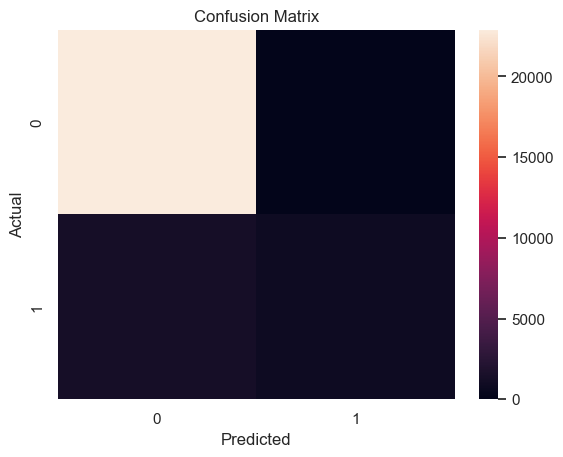

In [234]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [236]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
Score=classifier.score(x_test , y_test)
print(classifier.feature_importances_)

print(Score*100)


[0.37283492 0.62716508]
93.428


In [237]:
y_pred = classifier.predict(x_test)
print(list(y_pred[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [238]:
print(list(y_test[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [239]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[22433   459]
 [ 1184   924]]


In [240]:
from sklearn.metrics import recall_score

labels = np.unique(y_test)
print("Available labels:", labels)


pos_label = labels[0]

print('Recall:', recall_score(y_test,y_pred, pos_label=pos_label))

Available labels: [0 1]
Recall: 0.9799493272759042


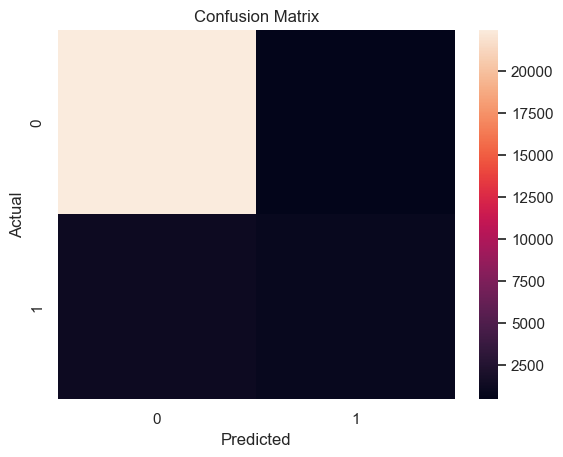

In [241]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbors (KNN)

In [243]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(x_train , y_train)
Score=knn.score(x_test , y_test)
print(Score*100)

94.856


In [244]:
y_pred = knn.predict(x_test)
print(list(y_pred[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [245]:
print(list(y_test[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Checking the best K_nearest neighbor in range 10 neighbor

In [247]:
k_values = range(3,10,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)  # Train the model
    y_pred = knn.predict(x_test)  # Predict on the test set
    accuracy = knn.score(x_test, y_test)  # Calculate accuracy
    test_accuracies.append(accuracy)
print(test_accuracies)
# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")


[0.93852, 0.94444, 0.94616, 0.9478]
The best k value is: 9


In [248]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[22854    38]
 [ 1267   841]]


In [249]:
from sklearn.metrics import recall_score

labels = np.unique(y_test)
print("Available labels:", labels)


pos_label = labels[0]

print('Recall:', recall_score(y_test,y_pred, pos_label=pos_label))

Available labels: [0 1]
Recall: 0.9983400314520356


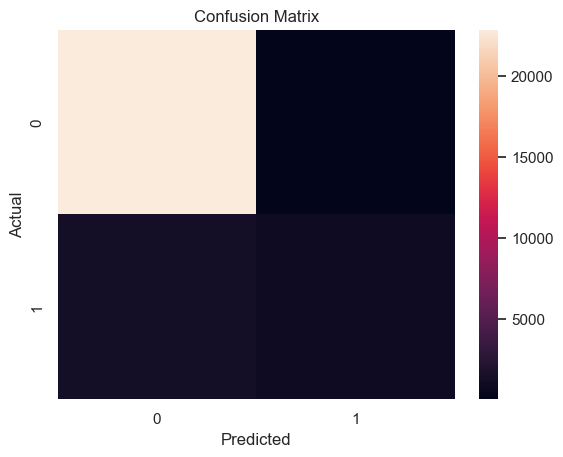

In [250]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# linear Regression

In [252]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)

reg.fit(x_train, y_train)

print(f'Score of Test {reg.score(x_test, y_test)}')


Score of Test 0.21365702170570877


In [253]:
y_pred = reg.predict(x_test)
print(list(y_pred[:50]))

[0.04250387951500789, 0.14563008292229074, -0.12570540411401276, 0.057679246985635424, 0.10049431436448664, -0.0470445061767954, 0.011835787318042135, -0.07273373056138854, 0.12211496069385275, 0.16077328706544425, 0.131867612272356, 0.131867612272356, 0.05502697093639919, -0.08349564727834519, 0.3197616072347158, 0.2716818812418741, 0.18030334630594735, 0.22420314082050585, 0.09058020032255187, 0.09058020032255187, 0.1932903940058468, 0.128118231045664, 0.05924122822801159, 0.3969514462408267, 0.11462052321217875, 0.2807014887537096, -0.08936561643551932, 0.13284563386974757, 0.08005088309457065, 0.12111683089770497, -0.021755831202174447, -0.12401877162041974, 0.02558279765396121, 0.131867612272356, -0.08279692902500657, 0.14287758879230372, 0.12740405247830966, -0.07456944747666483, 0.2209232835434748, 0.07384409430899086, 0.09058020032255187, -0.0470445061767954, 0.1043426709724865, 0.05330012204529366, 0.131867612272356, -0.044184063809049934, 0.06305525902268239, 0.02909092944825

In [254]:
print(list(y_test[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# AdaBoostClassifier

In [256]:
from sklearn.ensemble import AdaBoostClassifier
Adclf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
Adclf.fit(x_train, y_train)
Score=Adclf.score(x_test,y_test)
print(Score*100)

94.856


In [257]:
y_predict=Adclf.predict(x_test)
print(list(y_predict[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [258]:
print(list(y_test[:50]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [259]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[22892     0]
 [ 1286   822]]


In [260]:
from sklearn.metrics import recall_score
labels = np.unique(y_test)
print("Available labels:", labels)
pos_label = labels[0]

print('Recall:', recall_score(y_test,y_predict, pos_label=pos_label))

Available labels: [0 1]
Recall: 1.0


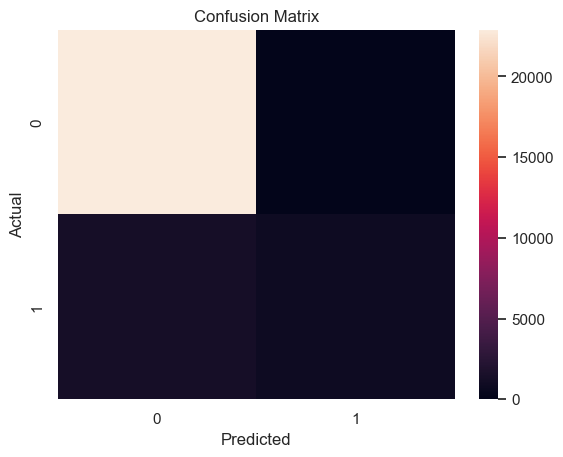

In [262]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()